--------------------- End of loading ------------------------------
                     |Loss:  2451
trainning ok ...
RMSE_znorm            0.074288
bias_znorm            0.068904
std_znorm             0.068904
RMSE                  0.091771
|znorm| > 0.15 (%)    3.430252
|znorm| > 3std (%)    1.796798
Name: Redshift, dtype: float64


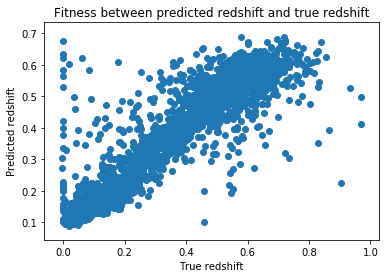

In [26]:
from utils import *
from xgboost import XGBRegressor as reg



def  objective (y_true, y_pred):
    grad = 2*(y_pred - y_true)/(y_true + 1)
    hess = 2/(y_true + 1)
    return grad, hess


file_csv = '../data/csvs/galaxies/all1_.csv';
dir_img = '../data/images/galaxies1/all/*.npy'

X_Train, Y_Train, X_Test, Y_Test = get_train_test(file_csv, dir_img, test_size = 0.3, size_all = None)

train_shape = X_Train.shape
train_sample_size = train_shape[0]

individu_dim = train_shape[1]*train_shape[2]*train_shape[3]

test_sample_size = X_Test.shape[0]

X_Train = X_Train.reshape(train_sample_size, individu_dim)
X_Test = X_Test.reshape(test_sample_size, individu_dim)


model = reg(max_depth=32*32*5, learning_rate=0.01, n_estimators=200, silent=False, objective = objective)

model.fit(X_Train, Y_Train)

print('trainning ok ...')

predict = model.predict(X_Test)
result = compute_metrics(Y_Test, predict, 'Redshift')     
print(result)
plot_result(Y_Test, predict)

In [23]:
import numpy as np
val = np.array([[[1,2,3], [4,5,6]], [[10,11,12],[13,14,15]]])
t = val.shape
v = val.reshape(t[1]*t[2]*t[0]//2,2)
print(v)


[[ 1  2]
 [ 3  4]
 [ 5  6]
 [10 11]
 [12 13]
 [14 15]]


In [ ]:
trainning ok ...
RMSE_znorm            0.072536
bias_znorm            0.067135
std_znorm             0.067135
RMSE                  0.091636
|znorm| > 0.15 (%)    3.462921
|znorm| > 3std (%)    1.927475
Name: Redshift, dtype: float64